# 데이터 시각화

이 데이터는 이미 NaN 처리와 날짜 데이터 처리가 완료된 데이터임

## 라이브러리 불러오기

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from freeman.task.trading.config import *

## 전역변수 선언

In [2]:
MERGE_PATH = "/home/freeman/projects/data/crawling/krx/merge/all-merge.csv"

## 파일 불러오기

In [3]:
all_df = pd.read_csv(MERGE_PATH, delimiter=",", encoding="UTF8", header="infer")

In [4]:
all_df.head()

,com_code,com_name,m_type,close,diff,ratio,open,high,low,volume,...,kospi_high,kospi_low,kospi_rate,usd_krw_close,usd_krw_open,usd_krw_high,usd_krw_low,usd_krw_rate,year,day_of_week
0,069110,3H,KOSDAQ,2865.0,370.0,14.83,2750.0,2865.0,2600.0,444105.0,...,1929.01,1906.33,3.13,1110.75,1114.05,1114.65,1109.95,-1.5,2011,4
1,060310,3S,KOSDAQ,9040.0,50.0,0.56,9000.0,9140.0,8990.0,85561.0,...,1929.01,1906.33,3.13,1110.75,1114.05,1114.65,1109.95,-1.5,2011,4
2,900010,3노드디지탈,KOSDAQ,1060.0,20.0,1.92,1050.0,1075.0,1045.0,889312.0,...,1929.01,1906.33,3.13,1110.75,1114.05,1114.65,1109.95,-1.5,2011,4
3,038120,AD모터스,KOSDAQ,540.0,-7.0,-1.28,550.0,564.0,502.0,2909746.0,...,1929.01,1906.33,3.13,1110.75,1114.05,1114.65,1109.95,-1.5,2011,4
4,013340,AJS,KOSDAQ,1230.0,-10.0,-0.81,1250.0,1280.0,1215.0,1485323.0,...,1929.01,1906.33,3.13,1110.75,1114.05,1114.65,1109.95,-1.5,2011,4


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851699 entries, 0 to 5851698
Data columns (total 56 columns):
 #   Column           Dtype  
---  ------           -----  
 0   com_code         object 
 1   com_name         object 
 2   m_type           object 
 3   close            float64
 4   diff             float64
 5   ratio            float64
 6   open             float64
 7   high             float64
 8   low              float64
 9   volume           float64
 10  value            float64
 11  t_value          float64
 12  t_volume         float64
 13  date             object 
 14  snp500_close     float64
 15  snp500_open      float64
 16  snp500_high      float64
 17  snp500_low       float64
 18  snp500_rate      float64
 19  nasdaq_close     float64
 20  nasdaq_open      float64
 21  nasdaq_high      float64
 22  nasdaq_low       float64
 23  nasdaq_rate      float64
 24  nasdaq100_close  float64
 25  nasdaq100_open   float64
 26  nasdaq100_high   float64
 27  nasdaq100_lo

## 변환

### 날짜 형 변환(str -> pd.datetime)

In [6]:
all_df["date"] = pd.to_datetime(all_df["date"])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851699 entries, 0 to 5851698
Data columns (total 56 columns):
 #   Column           Dtype         
---  ------           -----         
 0   com_code         object        
 1   com_name         object        
 2   m_type           object        
 3   close            float64       
 4   diff             float64       
 5   ratio            float64       
 6   open             float64       
 7   high             float64       
 8   low              float64       
 9   volume           float64       
 10  value            float64       
 11  t_value          float64       
 12  t_volume         float64       
 13  date             datetime64[ns]
 14  snp500_close     float64       
 15  snp500_open      float64       
 16  snp500_high      float64       
 17  snp500_low       float64       
 18  snp500_rate      float64       
 19  nasdaq_close     float64       
 20  nasdaq_open      float64       
 21  nasdaq_high      float64       

## 특정회사 데이터 추출

### 회사 이름으로 추출

In [7]:
special_df = all_df[all_df["com_name"]==SPECIAL_COMPANY].copy(deep=True)
special_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 762 to 5850035
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   com_code         2609 non-null   object        
 1   com_name         2609 non-null   object        
 2   m_type           2609 non-null   object        
 3   close            2609 non-null   float64       
 4   diff             2609 non-null   float64       
 5   ratio            2609 non-null   float64       
 6   open             2609 non-null   float64       
 7   high             2609 non-null   float64       
 8   low              2609 non-null   float64       
 9   volume           2609 non-null   float64       
 10  value            2609 non-null   float64       
 11  t_value          2609 non-null   float64       
 12  t_volume         2609 non-null   float64       
 13  date             2609 non-null   datetime64[ns]
 14  snp500_close     2609 non-null   fl

### 증감자 일자 확인

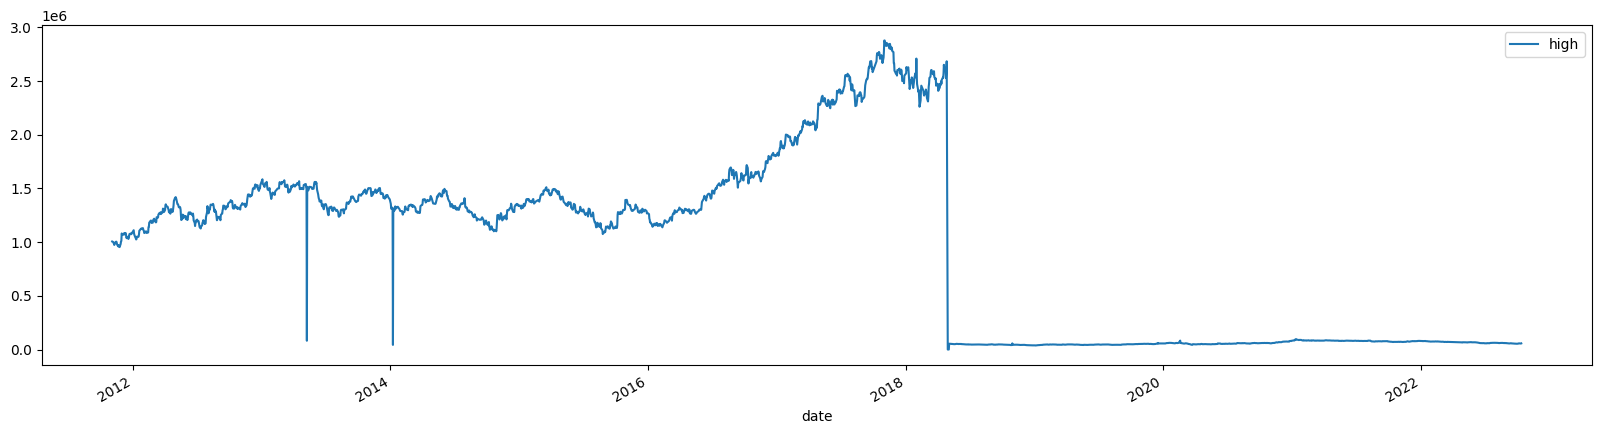

In [8]:
special_df[["high", "date"]].plot(x="date", figsize=(20,5))
plt.show()

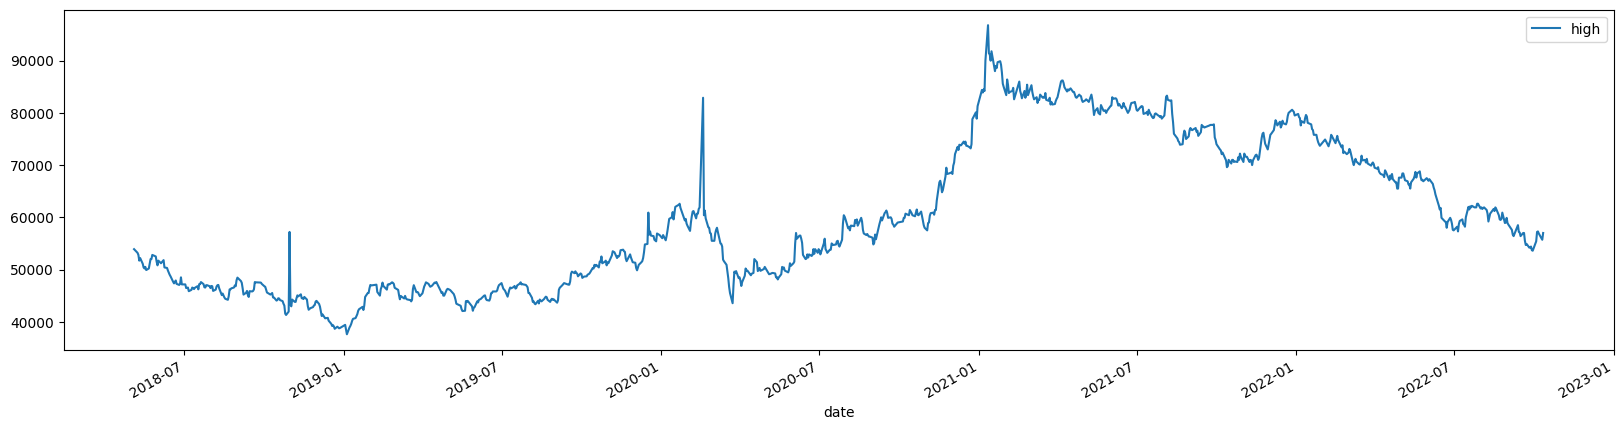

In [9]:
special_df[special_df["date"].astype("str") > "2018-05-03"][["high", "date"]].plot(x="date", figsize=(20,5))
plt.show()

### 증감자 이후 데이터 추출

In [10]:
data_df = special_df[special_df["date"].astype("str") > "2018-05-03"].copy(deep=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 3218180 to 5850035
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   com_code         1058 non-null   object        
 1   com_name         1058 non-null   object        
 2   m_type           1058 non-null   object        
 3   close            1058 non-null   float64       
 4   diff             1058 non-null   float64       
 5   ratio            1058 non-null   float64       
 6   open             1058 non-null   float64       
 7   high             1058 non-null   float64       
 8   low              1058 non-null   float64       
 9   volume           1058 non-null   float64       
 10  value            1058 non-null   float64       
 11  t_value          1058 non-null   float64       
 12  t_volume         1058 non-null   float64       
 13  date             1058 non-null   datetime64[ns]
 14  snp500_close     1058 non-null 

### 이상한 데이터 확인
특이하긴 하지만 이상점을 찾지 못해 그대로 사용

In [11]:
data_df[data_df["date"].astype("str").isin(["2018-10-30", "2018-10-29", "2018-10-31"])].T

,3480988,3483368,3485785
com_code,005930,005930,005930
com_name,삼성전자,삼성전자,삼성전자
m_type,KOSPI,KOSPI,KOSPI
close,41400.0,56300.0,42400.0
diff,400.0,-400.0,50.0
ratio,0.98,-0.71,0.12
open,40850.0,56700.0,42900.0
high,41950.0,57200.0,43350.0
low,40550.0,56000.0,41700.0
volume,14460521.0,15558208.0,17621480.0


## 학습용 컬럼만 추출

In [12]:
data_df = data_df[data_df.columns.drop(["com_code", "com_name", "m_type"])].copy(deep=True)
data_df.shape

(1058, 53)

## 인덱스 재설정
일자 정보를 인덱스로 활용

In [13]:
data_df.set_index("date", inplace=True)
data_df

,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,...,kospi_high,kospi_low,kospi_rate,usd_krw_close,usd_krw_open,usd_krw_high,usd_krw_low,usd_krw_rate,year,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2018-05-04,51900.0,-1100.0,-2.08,53000.0,53900.0,51800.0,39565391.0,2.078018e+12,3.331630e+14,6.419325e+09,...,2487.77,2461.38,-1.04,1074.11,1075.56,1079.50,1073.45,-0.13,2018,4
2018-05-08,52600.0,700.0,1.35,52600.0,53200.0,51900.0,23104720.0,1.218273e+12,3.376565e+14,6.419325e+09,...,2479.75,2444.08,-0.47,1078.56,1080.04,1081.54,1075.88,-0.14,2018,1
2018-05-09,50900.0,-1700.0,-3.23,52600.0,52800.0,50900.0,16128305.0,8.313719e+11,3.267436e+14,6.419325e+09,...,2451.86,2428.79,-0.24,1079.38,1078.43,1083.73,1076.37,0.08,2018,2
2018-05-10,51600.0,700.0,1.38,51700.0,51700.0,50600.0,13905263.0,7.122057e+11,3.312372e+14,6.419325e+09,...,2464.72,2448.01,0.83,1065.80,1079.48,1081.51,1064.43,-1.26,2018,3
2018-05-11,51300.0,-300.0,-0.58,52000.0,52200.0,51200.0,10314997.0,5.337650e+11,3.293114e+14,6.419325e+09,...,2483.85,2468.41,0.55,1067.98,1065.79,1071.30,1064.79,0.20,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,56000.0,800.0,1.45,56900.0,57200.0,55400.0,22458970.0,1.261934e+12,3.343078e+14,5.969783e+09,...,2253.93,2204.03,0.26,1415.63,1416.34,1424.23,1410.05,0.01,2022,2
2022-10-06,56300.0,300.0,0.54,56700.0,57300.0,56300.0,14944446.0,8.480818e+11,3.360988e+14,5.969783e+09,...,2250.87,2223.36,1.02,1408.31,1417.05,1417.62,1397.24,-0.52,2022,3
2022-10-07,56200.0,-100.0,-0.18,55900.0,56900.0,55200.0,16886813.0,9.490271e+11,3.355018e+14,5.969783e+09,...,2245.88,2215.08,-0.22,1415.51,1408.62,1417.37,1402.00,0.51,2022,4


## 0~1로 정규화

In [14]:
max_values = data_df.describe().T["max"]
max_values

close              9.100000e+04
diff               5.900000e+03
ratio              1.047000e+01
open               9.030000e+04
high               9.680000e+04
low                8.950000e+04
volume             9.030618e+07
value              8.379238e+12
t_value            5.432502e+14
t_volume           6.419325e+09
snp500_close       4.796560e+03
snp500_open        4.804510e+03
snp500_high        4.818620e+03
snp500_low         4.780040e+03
snp500_rate        9.380000e+00
nasdaq_close       1.605744e+04
nasdaq_open        1.612092e+04
nasdaq_high        1.621223e+04
nasdaq_low         1.601723e+04
nasdaq_rate        9.350000e+00
nasdaq100_close    1.657334e+04
nasdaq100_open     1.664477e+04
nasdaq100_high     1.676485e+04
nasdaq100_low      1.652383e+04
nasdaq100_rate     1.007000e+01
kosdaq_close       1.060000e+03
kosdaq_open        1.061320e+03
kosdaq_high        1.062030e+03
kosdaq_low         1.055640e+03
kosdaq_rate        9.200000e+00
kospi100_close     3.345450e+03
kospi100

In [15]:
for k in max_values.keys():
    data_df[k] = data_df[k] / max_values[k]

In [16]:
data_df

,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,...,kospi_high,kospi_low,kospi_rate,usd_krw_close,usd_krw_open,usd_krw_high,usd_krw_low,usd_krw_rate,year,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2018-05-04,0.570330,-0.186441,-0.198663,0.586932,0.556818,0.578771,0.438125,0.247996,0.613277,1.00000,...,0.750214,0.746905,-0.120930,0.745930,0.750791,0.746728,0.751731,-0.074713,0.998022,1.00
2018-05-08,0.578022,0.118644,0.128940,0.582503,0.549587,0.579888,0.255849,0.145392,0.621549,1.00000,...,0.747796,0.741655,-0.054651,0.749021,0.753918,0.748139,0.753433,-0.080460,0.998022,0.25
2018-05-09,0.559341,-0.288136,-0.308500,0.582503,0.545455,0.568715,0.178596,0.099218,0.601461,1.00000,...,0.739385,0.737015,-0.027907,0.749590,0.752794,0.749654,0.753776,0.045977,0.998022,0.50
2018-05-10,0.567033,0.118644,0.131805,0.572536,0.534091,0.565363,0.153979,0.084996,0.609732,1.00000,...,0.743263,0.742848,0.096512,0.740159,0.753527,0.748118,0.745415,-0.724138,0.998022,0.75
2018-05-11,0.563736,-0.050847,-0.055396,0.575858,0.539256,0.572067,0.114222,0.063701,0.606187,1.00000,...,0.749032,0.749038,0.063953,0.741673,0.743971,0.741056,0.745667,0.114943,0.998022,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.615385,0.135593,0.138491,0.630122,0.590909,0.618994,0.248698,0.150602,0.615385,0.92997,...,0.679697,0.668812,0.030233,0.983104,0.988671,0.985190,0.987451,0.005747,1.000000,0.50
2022-10-06,0.618681,0.050847,0.051576,0.627907,0.591942,0.629050,0.165486,0.101212,0.618681,0.92997,...,0.678774,0.674678,0.118605,0.978020,0.989166,0.980618,0.978480,-0.298851,1.000000,0.75
2022-10-07,0.617582,-0.016949,-0.017192,0.619048,0.587810,0.616760,0.186995,0.113259,0.617582,0.92997,...,0.677270,0.672165,-0.025581,0.983020,0.983282,0.980445,0.981813,0.293103,1.000000,1.00


## 레이블 추가

In [17]:
label_sr = data_df["close"]
label_n = label_sr.to_numpy()
label_n = label_n[1:]
label_n = np.append(label_n, np.array([0.]))
data_df["label"] = label_n
data_df

,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,...,kospi_low,kospi_rate,usd_krw_close,usd_krw_open,usd_krw_high,usd_krw_low,usd_krw_rate,year,day_of_week,label
date,,,,,,,,,,,,,,,,,,,,,
2018-05-04,0.570330,-0.186441,-0.198663,0.586932,0.556818,0.578771,0.438125,0.247996,0.613277,1.00000,...,0.746905,-0.120930,0.745930,0.750791,0.746728,0.751731,-0.074713,0.998022,1.00,0.578022
2018-05-08,0.578022,0.118644,0.128940,0.582503,0.549587,0.579888,0.255849,0.145392,0.621549,1.00000,...,0.741655,-0.054651,0.749021,0.753918,0.748139,0.753433,-0.080460,0.998022,0.25,0.559341
2018-05-09,0.559341,-0.288136,-0.308500,0.582503,0.545455,0.568715,0.178596,0.099218,0.601461,1.00000,...,0.737015,-0.027907,0.749590,0.752794,0.749654,0.753776,0.045977,0.998022,0.50,0.567033
2018-05-10,0.567033,0.118644,0.131805,0.572536,0.534091,0.565363,0.153979,0.084996,0.609732,1.00000,...,0.742848,0.096512,0.740159,0.753527,0.748118,0.745415,-0.724138,0.998022,0.75,0.563736
2018-05-11,0.563736,-0.050847,-0.055396,0.575858,0.539256,0.572067,0.114222,0.063701,0.606187,1.00000,...,0.749038,0.063953,0.741673,0.743971,0.741056,0.745667,0.114943,0.998022,1.00,0.550549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.615385,0.135593,0.138491,0.630122,0.590909,0.618994,0.248698,0.150602,0.615385,0.92997,...,0.668812,0.030233,0.983104,0.988671,0.985190,0.987451,0.005747,1.000000,0.50,0.618681
2022-10-06,0.618681,0.050847,0.051576,0.627907,0.591942,0.629050,0.165486,0.101212,0.618681,0.92997,...,0.674678,0.118605,0.978020,0.989166,0.980618,0.978480,-0.298851,1.000000,0.75,0.617582
2022-10-07,0.617582,-0.016949,-0.017192,0.619048,0.587810,0.616760,0.186995,0.113259,0.617582,0.92997,...,0.672165,-0.025581,0.983020,0.983282,0.980445,0.981813,0.293103,1.000000,1.00,0.608791


## 훈련/시험 데이터 분리

In [21]:
train_df = data_df[:-99]
test_df = data_df[-99:]

### 임시저장

In [22]:
train_df.to_csv("/home/freeman/projects/data/trading/data/train_5930.csv")
test_df.to_csv("/home/freeman/projects/data/trading/data/test_5930.csv")

## max값 저장

In [20]:
with open(f"/home/freeman/projects/data/trading/temp/max_value.pkl", "wb") as f:
    pickle.dump(max_values, f)